# Question 4: Sample and Population parameters

We have been given a dataset with 10,000 tuples of data. To evaluate the sample mean, variance and population mean and variance, I have used pandas to extract data from the CSV into a dataframe and have then converted it into a numpy array.

In the consequent sections, I will describe the flow of the code and what each section is doing

In [5]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.patches import FancyArrowPatch
#from mpl_toolkits.mplot3d import proj3d
import numpy as np
import math

To run the code, we need to run the next cell. The cell will then prompt you to choose a file. In that, choose the yearly_sales.csv file.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving yearly_sales.csv to yearly_sales.csv


This function generates the indices from 1 - 10,000 pseudo randomly so as to facilitate random sampling. This function along with the next cell is responsible for enabling us to do sampling without replacement, that is no data point will come up more than once in a sample set

In [3]:
def generateRandomIndices():
  required = 10000
  X = np.zeros(required)
  start = 27621
  A = 247
  b = 2
  m = 10001
  z = 0
  while z < required:
    X[z] = (int)((A*start + b)  % m )#+ 1
    start = X[z]
    b = b + 30
    z = z + 1
  return X

The perm and randomperm are lists which help the above generator to shuffle the indices. After the indices have been generated, there are still some non-distinct indices left. To remove that and bring about more randomness, the following cell uses the generated random indices to form a permutation of the elements such that all 10000 indices have 1 slot each in the randomperm

In [6]:
perm = []
randomperm = []
perm = generateRandomIndices()

k=1
for i in range(10000):
  randomperm.append(k)
  k=k+1

for i in range(10000):
  
  if perm[i]>=10000 or perm[-i-1]>=10000:
    perm[i]-=1
  
  randomperm[i], randomperm[(int)(perm[-i-1])] = randomperm[int(perm[-i-1])], randomperm[i] 


for i in range(10000):
  randomperm[i] = (int)(randomperm[i])
  
"""
Checking for duplicate indices if any
"""
def test_duplicate(array_nums):
   nums_set = set(array_nums)    
   return len(array_nums)-len(nums_set)     

test_duplicate(randomperm)

0

Now randomperm has 1-10000 indices arranged in random order. 
So for random sampling, we can now take different sample sizes sequentially from randomperm.


Since, the indices are in random order and are distinct, this would mean we will have all disjoint sample sets and will
be equivalent to random sampling without replacement.

## Q4(a):
After executing this code, we can see clearly that the sample mean and sample variance are inching closer to the population mean and population variance as we increase our sample size. This can be easily understood by noting the fact that as more and more samples are drawn, they will be better representatives of the population characteristics.

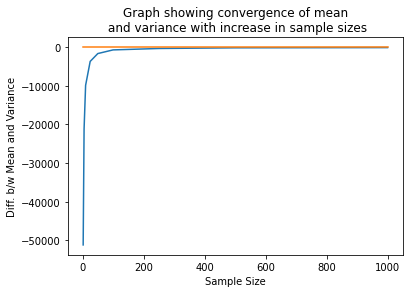


Sample Mean for the different sample sizes
[249.45567629 249.45567629 249.45567629 249.45567629 249.45567629
 249.45567629 249.45567629 249.45567629 249.45567629]

Sample Variance for the different sample sizes
[ 50608.72730488  80618.76484749  91921.65966211  98115.74169211
 100147.90209266 101095.5663514  101462.00014068 101636.74331238
 101691.09922933]


Population Mean:  249.455676294528
Population Variance:  101783.22218085403


In [8]:

import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['yearly_sales.csv']))
df1 = df2
np.sum(df2.sales_total)       #sum of entire population 
n = len(df1.sales_total)      #total elements in the population

popMean = np.sum(df2.sales_total)/len(df2.sales_total)
popData = df1.to_numpy()      #Converting the dataframe to a numpy array

z = 0
popVariance = 0
while z < len(df2.sales_total):
  popVariance = popVariance + ((popData[z][1]-popMean)**2)/len(df2.sales_total)
  z = z + 1

#Taking different sample sizes

sampleSize = [2,5,10,25,50,100,250,500,1000]
sampleVariance = np.zeros(len(sampleSize))
sampleMean = np.zeros(len(sampleSize))


for i in range(len(randomperm)):
  randomperm[i] = (int)(randomperm[i]-1)

for i in range(len(sampleSize)):
  limit = (int)(10000/sampleSize[i])
  
  sampleMean_Dash = np.zeros(limit)
  sampleVariance_Dash = np.zeros(limit)
  g = 0
  sampleData = np.zeros((limit,sampleSize[i]))    
  
  for j in range(limit):
    k = 0
    for k in range(sampleSize[i]):
      sampleData[j][k] = popData[randomperm[g]][1]
      g = g + 1                       
    
    sampleMean_Dash[j] = np.sum(sampleData[j])/sampleSize[i]

    for k in range(sampleSize[i]):
      sampleVariance_Dash[j] += ((sampleData[j][k]-sampleMean_Dash[j])**2)/sampleSize[i]
    
  
  sampleMean[i] = np.sum(sampleMean_Dash)/limit
  sampleVariance[i] = np.sum(sampleVariance_Dash)/limit


sampleVarianceFinal = np.sum(sampleVariance)/len(sampleSize)

absVar = np.zeros(len(sampleSize))
absMean = np.zeros(len(sampleSize))

for i in range(len(sampleSize)):
  absVar[i] = sampleVariance[i]-popVariance
  absMean[i] = sampleMean[i]-popMean
plt.plot(sampleSize,absVar)
plt.plot(sampleSize,absMean)
plt.xlabel("Sample Size")
plt.ylabel("Diff. b/w Mean and Variance")#print(sampleVariance)
plt.title("Graph showing convergence of mean\n and variance with increase in sample sizes")
plt.show()

print("\nSample Mean for the different sample sizes")
print(sampleMean)
print("\nSample Variance for the different sample sizes")
print(sampleVariance)

print("\n\nPopulation Mean: ",popMean)
print("Population Variance: ",popVariance)

## Q4(b):
The graph shows the convergence of the expected sample mean and expected sample variance to the population mean and population variance respectively. This sums up our observations for part(a) and validates the theoretical result for part(b).